In [1]:
# Required library and line of code to connect to Google Drive.
# If you are working on a local computer, you can skip this part.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Ahmet Yıldız
import pandas as pd
import numpy as np
import tensorflow.keras as k
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import os
# The path to the file will be working with.
os.chdir('/content/drive/MyDrive/yapay_zeka_video/S-001-Heart-Disease')

In [3]:
# Dataset has been downloaded from https://www.kaggle.com/ronitf/heart-disease-uci.

# Read the data
df=pd.read_csv('heart.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
# Which columns are in the dataset?
# Is there a null or invalid value?
# What are the data types of the columns?
df.info()

# There is no string type in the dtype part. can display it graphically or 
# perform normalization without any additional processing.
# The 'target' column has values 0 and 1. If there were values such as 
# 'Has heart disease' and 'No heart disease' instead of these, 
# would have to convert them to numbers.
# Or could have written 'Female' and 'Male' in the 'sex' column 
# instead of 0 or 1. In such a case, convert string values to numbers 
# by giving them ids to represent them.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


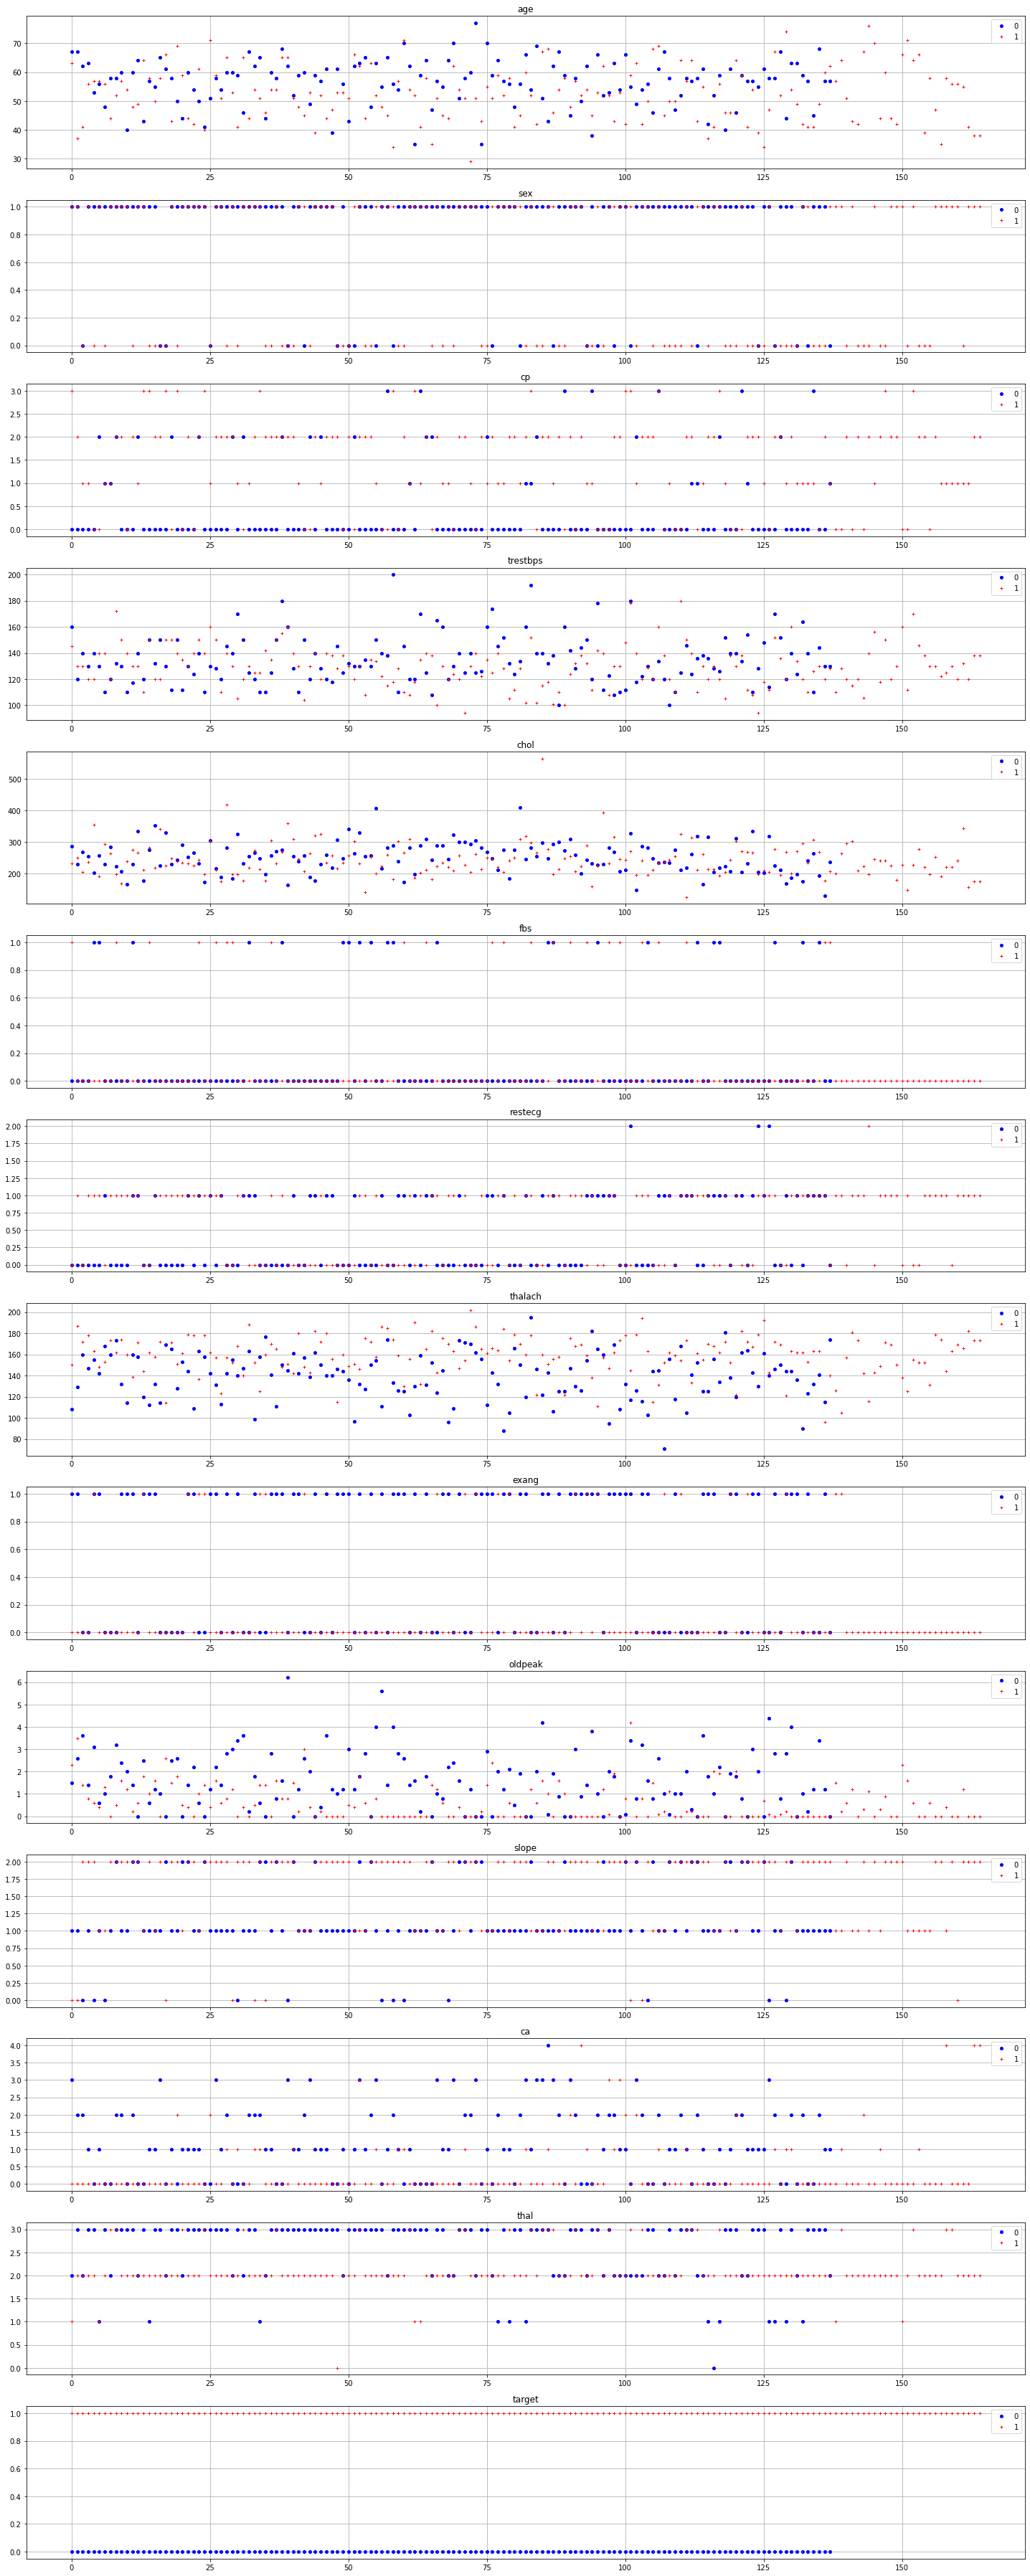

In [4]:
# First, group the data according to their class. 
# Then graph each feature of the data.

class_0,class_1=[],[]
def split_class(colm):
  c0,c1=[],[]
  for x in range(len(df)):
    if df['target'][x]==0: c0.append(df[colm][x])
    else:c1.append(df[colm][x])
  return c0,c1

plt.figure(figsize=(20,50))

for x in range(len(df.columns)):
  class_0,class_1=split_class(df.columns[x])

  plt.subplot(14,1,x+1)
  plt.plot(class_0,'bo', markersize=4)
  plt.plot(class_1,'r+', markersize=4)
  plt.legend(['0','1'])
  plt.title(df.columns[x])
  plt.grid(which='both')
plt.tight_layout()
plt.show()



In [5]:
# Normalization
# Scale the data between 0-1. 
normalizer=MinMaxScaler()
data=normalizer.fit_transform(X=df.values.tolist())
# Rescaled data
df_data=pd.DataFrame(data,columns=df.columns)
df_data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0
5,0.583333,1.0,0.000000,0.433962,0.150685,0.0,0.5,0.587786,0.0,0.064516,0.5,0.0,0.333333,1.0
6,0.562500,0.0,0.333333,0.433962,0.383562,0.0,0.0,0.625954,0.0,0.209677,0.5,0.0,0.666667,1.0
7,0.312500,1.0,0.333333,0.245283,0.312785,0.0,0.5,0.778626,0.0,0.000000,1.0,0.0,1.000000,1.0
8,0.479167,1.0,0.666667,0.735849,0.166667,1.0,0.5,0.694656,0.0,0.080645,1.0,0.0,1.000000,1.0
9,0.583333,1.0,0.666667,0.528302,0.095890,0.0,0.5,0.786260,0.0,0.258065,1.0,0.0,0.666667,1.0


In [6]:
# Split data into input, output
input_size=13
x_data=data[:,:input_size]
y_data=data[:,input_size:]

print('x_data :',x_data.shape)
print('y_data :',y_data.shape)
print('-------------------')

# Data to be used in training: x and y train
# Data to be used in the test: x and y test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33, random_state=42)

print('x_train :',x_train.shape)
print('y_train :',y_train.shape)
print('x_test  :',x_test.shape)
print('y_test  :',y_test.shape)

x_data : (303, 13)
y_data : (303, 1)
-------------------
x_train : (203, 13)
y_train : (203, 1)
x_test  : (100, 13)
y_test  : (100, 1)


In [9]:
dropout=0.2
# Let's create our model
# 1 input layer, number of units input_size=13
# 1 hidden layer, number of units 20, activation method 'relu'. 
#    Relu usually gives good results.
# 1 output layer, number of units 1, activation method 'sigmoid'.
#    trying to guess if there is only one class.

# And between layers add dropout to prevent overfitting.

model=k.Sequential()
model.add(k.layers.InputLayer(input_shape=(input_size,)))
model.add(k.layers.Dropout(dropout))
model.add(k.layers.Dense(20,activation='relu'))
model.add(k.layers.Dropout(dropout))
model.add(k.layers.Dense(1,activation='sigmoid'))

# optimizer : 'Adam'. It generally gives good results.
# loss : 'binary_crossentropy'. It works best for classification problems 
#       that have only one class.
# metrics: 'accuracy' . This parameter is necessary for us to learn how much of 
#         the data is predicted correctly.

opt=k.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 13)                0         
                                                                 
 dense (Dense)               (None, 20)                280       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
26/26 [==============================] - 1s 9ms/step - loss: 0.7666 - accuracy: 0.4187 - val_loss: 0.7075 - val_accuracy: 0.4500
Epoch 2/50
26/26 [==============================] - 0s 3ms/step - loss: 0.7243 - accuracy: 0.4877 - val_loss: 0.6857 - val_accuracy: 0.4900
Epoch 3/50
26/26 [==============================] - 0s 3ms/step - loss: 0.6784 - accuracy: 0.5665 - val_loss: 0.6584 - val_accuracy: 0.6000
Epoch 4/50
26/26 [==============================] - 0s 3ms/step - loss: 0.6608 - accuracy: 0.6207 - val_loss: 0.6380 - val_accuracy: 0.6400
Epoch 5/50
26/26 [==============================] - 0s 3ms/step - loss: 0.6239 - accuracy: 0.6552 - val_loss: 0.6168 - val_accuracy: 0.7200
Epoch 6/50
26/26 [==============================] - 0s 3ms/step - loss: 0.6344 - accuracy: 0.6404 - val_loss: 0.6016 - val_accuracy: 0.7400
Epoch 7/50
26/26 [==============================] - 0s 3ms/step - loss: 0.5936 - accuracy: 0.7389 - val_loss: 0.5863 - val_accuracy: 0.7600
Epoch 8/50
26/26 [==

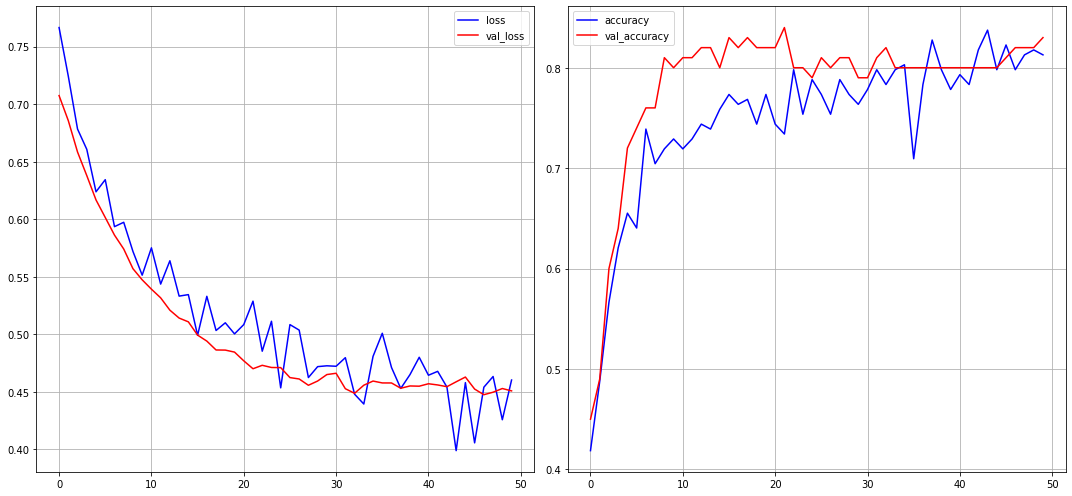

In [10]:
#  train model
history=model.fit(x_train,y_train,batch_size=8,epochs=50,validation_data=(x_test,y_test))

#  Let's show the training performance with a graph

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-')
plt.plot(history.history['val_loss'],'r-')
plt.legend(['loss','val_loss'])
plt.grid(which='both')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'b-')
plt.plot(history.history['val_accuracy'],'r-')
plt.legend(['accuracy','val_accuracy'])
plt.grid(which='both')

plt.tight_layout()
plt.show()

In [11]:
# see the performance of our model with the evalute method

train_score=model.evaluate(x_train,y_train,verbose=0)

test_score=model.evaluate(x_test,y_test,verbose=0)

print('Trian     Loss : ',train_score[0])
print('Trian Accuracy :%',train_score[1]*100)
print()
print('Test      Loss : ',test_score[0])
print('Test  Accuracy :%',test_score[1]*100)

Trian     Loss :  0.3705659806728363
Trian Accuracy :% 85.71428656578064

Test      Loss :  0.4509187340736389
Test  Accuracy :% 82.99999833106995


In [12]:
# save model
model.save('s_001_heart_disease.h5')

In [20]:
# test it manually

# age-sex-cp-trestbps-chol-fbs-restecg-thalach-exang-oldpeak-slope-ca-thal-target
# 70	1	1	156	245	0	0	143	0	0	2	0	2	1
test_data=[70	,1,	1	,156,	245,	0	,0,	143,	0	,0	,2,	0,	2	,1]

# apply normalization
test_data=normalizer.transform([test_data])
pred_test_data=model.predict(test_data[:,:input_size])
pred_test_data[0][0]

0.7527477

In [8]:
def get_input(msg):
  while True:
    v=input(msg)
    if v.isdecimal():
      return float(v)
    else:
      if v=='q':
        return 'q'
      else:
        print("Please enter a valid value.")

# load model from file

model=k.models.load_model("s_001_heart_disease.h5")

isContinue=True
while isContinue:
  print("press q to exit")
  test_data=[]
  for x in range(len(df.columns)-1):
    v=get_input(df.columns[x]+" :")
    if v=='q':
      isContinue=False
      break
    else:
      test_data.append(v)
  
  if isContinue:
    test_data.append(1)
    test_data=normalizer.transform([test_data])
    pred_test_data=model.predict(test_data[:,:input_size])
    if pred_test_data[0][0]<0.5:
      print("Has heart disease.")
    else:
      print("No heart disease.")
    
    print(pred_test_data[0][0],"\n")

# 70	1	1	156	245	0	0	143	0	0	2	0	2	1

press q to exit
age :70
sex :1
cp :1
trestbps :156
chol :245
fbs :0
restecg :0
thalach :143
exang :byj
Please enter a valid value.
exang :0
oldpeak :0
slope :2
ca :0
thal :2
No heart disease.
0.7527477 

press q to exit
age :q
